Reference: https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis/data

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('/Users/reecewu/Desktop/DAproject/CustomerChurn_241001/customer_churn_data.csv')

df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [165]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [166]:
df.dtypes

CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

# Data Visualization

### - Customer Profile

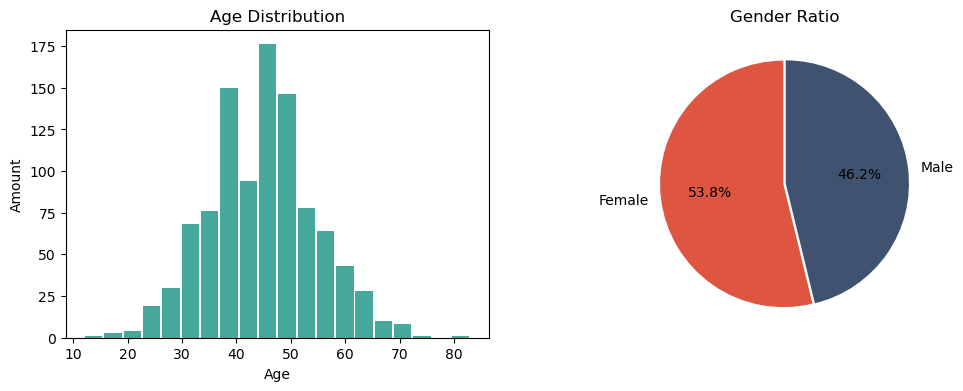

In [167]:
GenderAmount = df['Gender'].value_counts()

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins = 20, rwidth = 0.9, color = '#46a99b')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.pie(GenderAmount, labels = GenderAmount.index, autopct = '%1.1f%%', explode = (0.01, 0.01), startangle = 90, colors = ['#de5542', '#3f5371'])
plt.title('Gender Ratio')

plt.show()

### - Contract Content

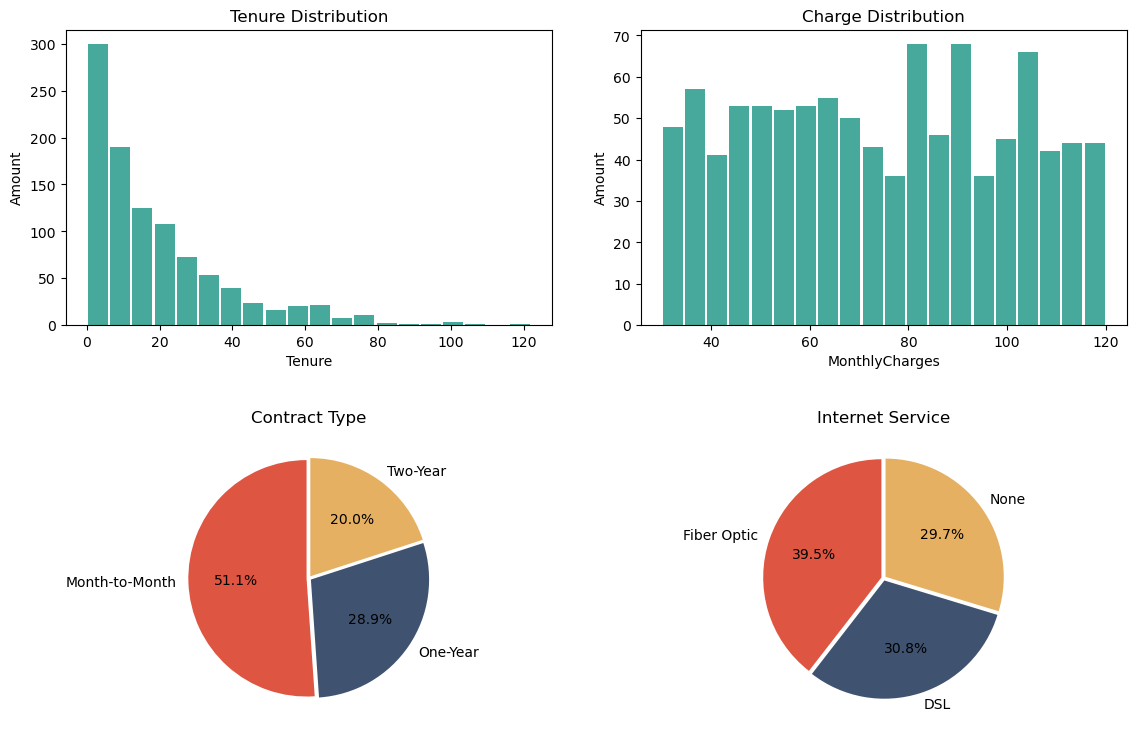

In [168]:
ContractType = df['ContractType'].value_counts()
InternetService = df['InternetService'].value_counts()

plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['Tenure'], bins = 20, rwidth = 0.9, color = '#46a99b')
plt.xlabel('Tenure')
plt.ylabel('Amount')
plt.title('Tenure Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['MonthlyCharges'], bins = 20, rwidth = 0.9, color = '#46a99b')
plt.xlabel('MonthlyCharges')
plt.ylabel('Amount')
plt.title('Charge Distribution')

plt.subplot(2, 2, 3)
plt.pie(ContractType, labels = ContractType.index, autopct = '%1.1f%%', 
        explode = (0.02, 0.02, 0.02), startangle = 90, colors = ['#de5542', '#3f5371', '#e6b062'])
plt.title('Contract Type')

plt.subplot(2, 2, 4)
plt.pie(InternetService, labels = InternetService.index, autopct = '%1.1f%%', 
        explode = (0.02, 0.02, 0.02), startangle = 90, colors = ['#de5542', '#3f5371', '#e6b062'])
plt.title('Internet Service')

plt.tight_layout(pad = 3)
plt.show()

# Machine Learning

In [169]:
df_ml = df.drop(columns = ['CustomerID', 'TotalCharges'])

df_ml.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,No,Yes
3,60,Female,8,102.34,One-Year,DSL,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,None,No,Yes


In [170]:
df_dummies = pd.get_dummies(df_ml, columns = ['Gender', 'ContractType', 'InternetService', 'TechSupport'])
for col in ['Gender', 'ContractType', 'InternetService', 'TechSupport']:
    mode_value = df_ml[col].value_counts().index[0]
    drop_col = f'{col}_{mode_value}'
    df_dummies.drop(columns = [drop_col], inplace = True)
    print('Deleted Column is:', drop_col)

X = df_dummies.drop(columns = ['Churn'])
y = df_ml['Churn'].map({'Yes': 1, 'No': 0})

Deleted Column is: Gender_Female
Deleted Column is: ContractType_Month-to-Month
Deleted Column is: InternetService_Fiber Optic
Deleted Column is: TechSupport_Yes


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [3, 5, 10],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [3, 5, 10],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    }
}

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

for model_name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model['model'])
    ])
    
    clf = GridSearchCV(pipe, model['params'], cv = 5, n_jobs = -1, scoring = scoring, refit = 'accuracy')
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'train_score': clf.best_estimator_.score(X_train, y_train),
        'cv_score': clf.best_score_,
        'test_score': clf.best_estimator_.score(X_test, y_test),
        'best_params': clf.best_params_
    })
    
    best_estimators[model_name] = clf.best_estimator_
    
scores_df = pd.DataFrame(scores)
scores_df

,model,train_score,cv_score,test_score,best_params
0,LogisticRegression,0.968571,0.961429,0.936667,{'model__C': 10}
1,DecisionTree,1.000000,0.997143,1.000000,"{'model__max_depth': 5, 'model__min_samples_le..."
2,RandomForest,1.000000,0.991429,0.990000,"{'model__max_depth': 10, 'model__min_samples_l..."
3,SVC,0.987143,0.974286,0.950000,"{'model__C': 10, 'model__kernel': 'rbf'}"


In [173]:
feature_name = X.columns
feature_importance = best_estimators['DecisionTree'].named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_name,
    'Importance': feature_importance
})

feature_importance_df.sort_values(by = 'Importance', ascending = False, inplace = True)
feature_importance_df

,Feature,Importance
5,ContractType_Two-Year,0.296911
2,MonthlyCharges,0.208587
1,Tenure,0.207944
4,ContractType_One-Year,0.172762
8,TechSupport_No,0.113796
0,Age,0.000000
3,Gender_Male,0.000000
6,InternetService_DSL,0.000000
7,InternetService_None,0.000000


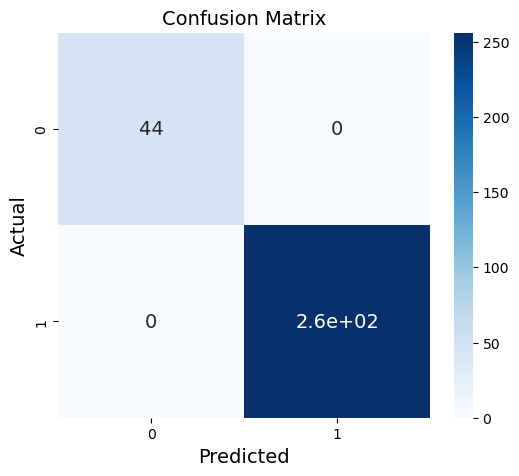

In [174]:
from sklearn.metrics import confusion_matrix

y_pred = best_estimators['DecisionTree'].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, cmap = 'Blues', annot_kws = {'size': 14})
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

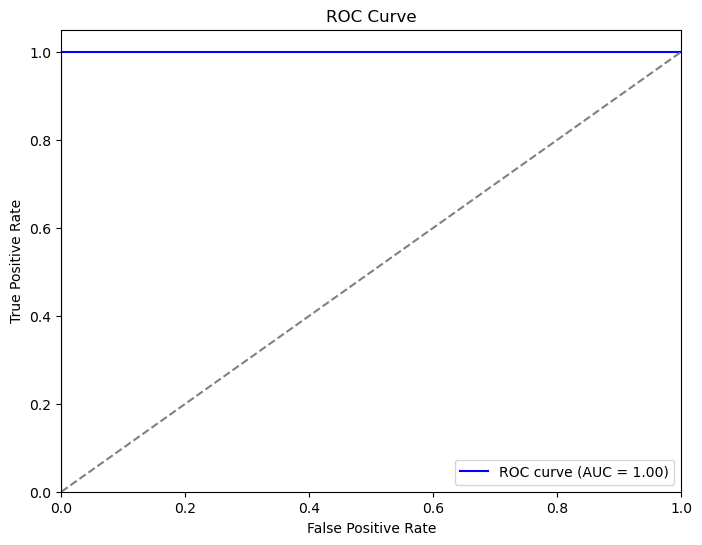

In [175]:
from sklearn.metrics import roc_curve, auc

best_model = best_estimators['DecisionTree']

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))

plt.plot(fpr, tpr, color = 'blue', label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()